# Advanced Machine Learning for NLP and Text Processing
## Project 1 : OpenFoodFacts

In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import mpld3
import random
# mpld3.enable_notebook()

### Read csv obtain from part 1

In [2]:
PATH = './dataset/openfoodfacts.csv'

In [3]:
dataset = pd.read_csv(PATH, sep = '\t') 

### Remove impossible entries 

In [4]:
dataset =  dataset[dataset["energy-kcal_100g"] < 15000] 

### Number of entries per categories
Check number in each category to see which one to study

In [5]:
dataset.groupby("pnns_groups_1").count()["product_name"]

pnns_groups_1
Alcoholic beverages          483
Beverages                  19064
Cereals and potatoes       26795
Composite foods            15610
Fat and sauces             24428
Fish Meat Eggs             16209
Fruits and vegetables       9032
Milk and dairy products    12039
Salty snacks                3231
Sugary snacks              47334
unknown                    94563
Name: product_name, dtype: int64

## Clustering approaches

### Remove NA
We have chosen to study the most relevant and filled columns

In [6]:
dataset = dataset.dropna(subset=[
    "energy-kcal_100g",
    "energy_100g",
    "fat_100g",
    "saturated-fat_100g",
    "carbohydrates_100g",
    "sugars_100g",
    "fiber_100g",
    "proteins_100g",
    "salt_100g",
    "sodium_100g"
])

### Define X
We choose here to first study **Cereals and potatoes**.

In [7]:
X = (dataset[dataset["pnns_groups_1"]=="Cereals and potatoes"])[[
    "energy-kcal_100g",
    "energy_100g",
    "fat_100g",
    "saturated-fat_100g",
    "carbohydrates_100g",
    "sugars_100g",
    "fiber_100g",
    "proteins_100g",
    "salt_100g",
    "sodium_100g"
]]

### K-means

Fit model

In [41]:
model=KMeans()
label = model.fit_predict(X)

Display of the result on two by two graphs

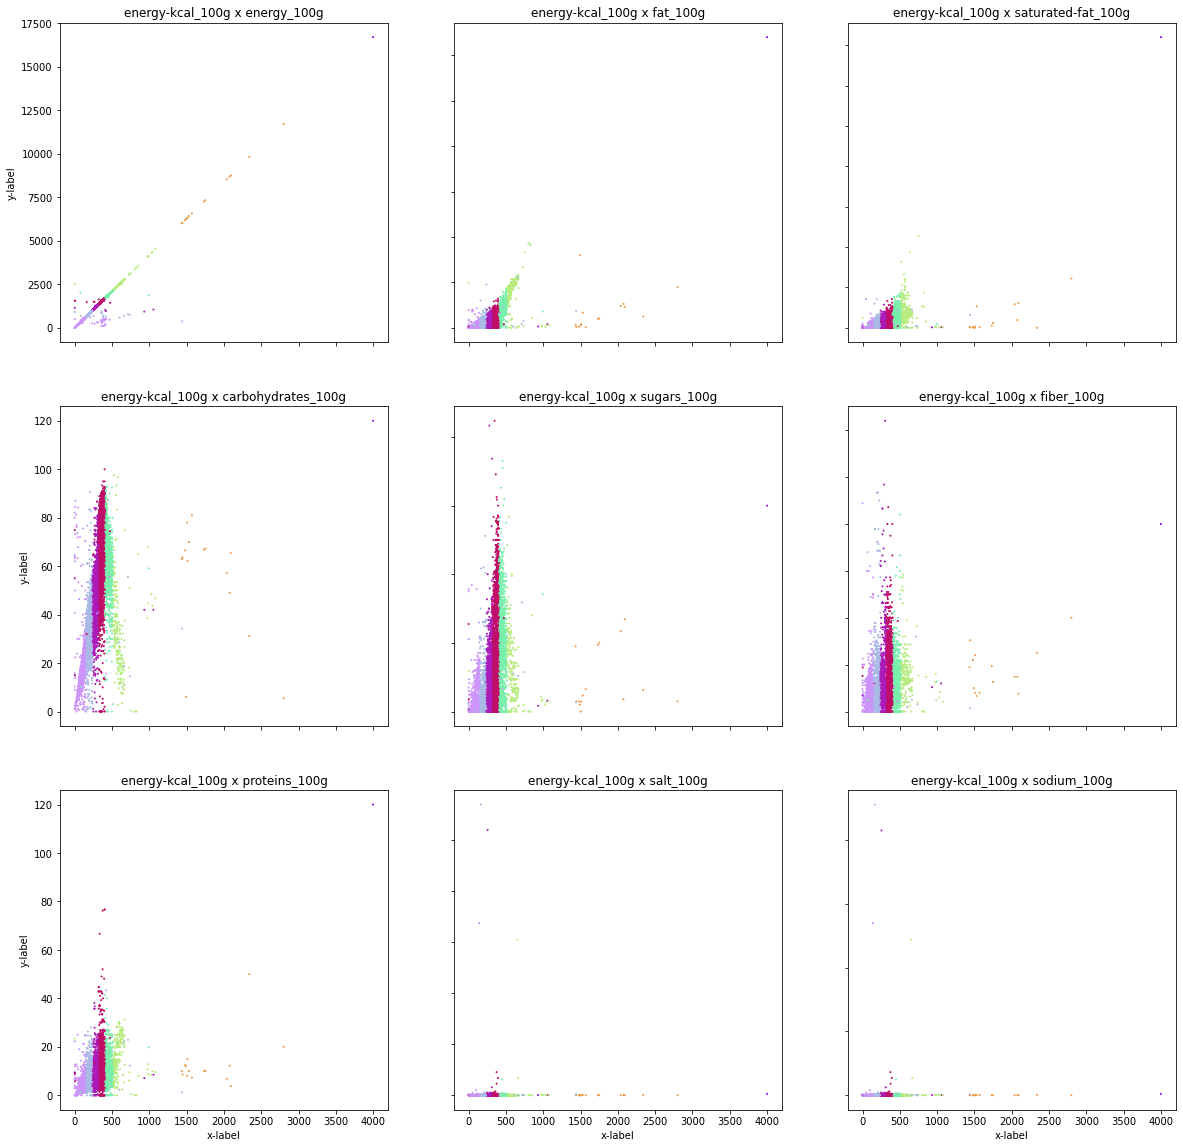

In [9]:
cmap = np.array([ np.random.choice(range(256), size=3)/256 for j in range(len(label))])
plt.rcParams["figure.figsize"]=20,20
fig, axs = plt.subplots(3, 3)
axs[0, 0].scatter(X["energy-kcal_100g"], X["energy_100g"], s=1, c=cmap[label])
axs[0, 0].set_title('energy-kcal_100g x energy_100g')
axs[0, 1].scatter(X["energy-kcal_100g"], X["fat_100g"], s=1, c=cmap[label])
axs[0, 1].set_title('energy-kcal_100g x fat_100g')
axs[0, 2].scatter(X["energy-kcal_100g"], X["saturated-fat_100g"], s=1, c=cmap[label])
axs[0, 2].set_title('energy-kcal_100g x saturated-fat_100g')
axs[1, 0].scatter(X["energy-kcal_100g"], X["carbohydrates_100g"], s=1, c=cmap[label])
axs[1, 0].set_title('energy-kcal_100g x carbohydrates_100g')
axs[1, 1].scatter(X["energy-kcal_100g"], X["sugars_100g"], s=1, c=cmap[label])
axs[1, 1].set_title('energy-kcal_100g x sugars_100g')
axs[1, 2].scatter(X["energy-kcal_100g"], X["fiber_100g"], s=1, c=cmap[label])
axs[1, 2].set_title('energy-kcal_100g x fiber_100g')
axs[2, 0].scatter(X["energy-kcal_100g"], X["proteins_100g"], s=1, c=cmap[label])
axs[2, 0].set_title('energy-kcal_100g x proteins_100g')
axs[2, 1].scatter(X["energy-kcal_100g"], X["salt_100g"], s=1, c=cmap[label])
axs[2, 1].set_title('energy-kcal_100g x salt_100g')
axs[2, 2].scatter(X["energy-kcal_100g"], X["sodium_100g"], s=1, c=cmap[label])
axs[2, 2].set_title('energy-kcal_100g x sodium_100g')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Let's see some elements of some clusters to try to understand the clusters made by the K-means

In [10]:
X_with_labels = X.copy()
X_with_labels["labels"] = label

In [11]:
(X_with_labels[X_with_labels["labels"]==0])[[
    "energy-kcal_100g",
    "energy_100g",
    "fat_100g",
    "saturated-fat_100g",
    "carbohydrates_100g",
    "sugars_100g",
    "fiber_100g",
    "proteins_100g",
    "salt_100g",
    "sodium_100g"
]].head()

,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
165,228.0,954.0,2.63,0.00,47.37,8.77,1.8,5.26,1.4025,0.561
175,235.0,983.0,1.47,0.00,50.00,5.88,2.9,8.82,1.2500,0.500
380,228.0,954.0,2.63,8.77,45.61,10.53,1.8,8.77,0.4825,0.193
559,190.0,795.0,2.50,1.00,24.00,1.00,2.0,8.00,0.3250,0.130
560,200.0,837.0,4.00,2.00,36.00,1.00,3.0,9.00,0.5500,0.220


In [12]:
(X_with_labels[X_with_labels["labels"]==1])[[
    "energy-kcal_100g",
    "energy_100g",
    "fat_100g",
    "saturated-fat_100g",
    "carbohydrates_100g",
    "sugars_100g",
    "fiber_100g",
    "proteins_100g",
    "salt_100g",
    "sodium_100g"
]].head()

,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
125,365.000000,1527.0,1.18,0.0,71.760000,4.710000,2.4,12.940000,1.19634,0.478536
325,360.000000,1506.0,0.00,0.0,78.000000,0.000000,2.0,12.000000,0.00000,0.000000
331,333.000000,1393.0,0.00,0.0,0.000000,0.000000,0.0,66.670000,0.00000,0.000000
349,355.555556,1488.0,0.00,0.0,75.555556,2.222222,7.5,15.555556,0.00000,0.000000
421,333.000000,1393.0,20.00,0.0,33.330000,6.670000,0.0,6.670000,0.08250,0.033000


### K-means with PCA first

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(X)
print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

Explained variation per principal component: [0.99633303 0.00126498]
Cumulative variance explained by 2 principal components: 99.76%


In [15]:
model=KMeans(5)
label = model.fit_predict(pca_2_result)

Display result

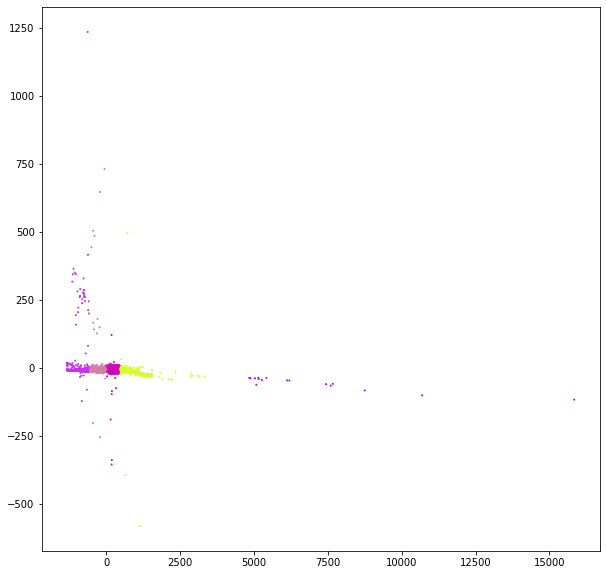

In [16]:
plt.rcParams["figure.figsize"]=10,10
cmap = np.array([ np.random.choice(range(256), size=3)/256 for j in range(len(label))])
plt.scatter(pca_2_result[:,0], pca_2_result[:,1], s=1, c=cmap[label])

Let's see some elements of some clusters to try to understand the clusters made by the K-means

In [17]:
X_with_labels = X.copy()
X_with_labels["labels"] = label
X_with_labels["product_name"] = dataset["product_name"]

In [18]:
(X_with_labels[X_with_labels["labels"]==0])[[
    "energy-kcal_100g",
    "energy_100g",
    "fat_100g",
    "saturated-fat_100g",
    "carbohydrates_100g",
    "sugars_100g",
    "fiber_100g",
    "proteins_100g",
    "salt_100g",
    "sodium_100g"
]].head()

,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
125,365.000000,1527.0,1.18,0.0,71.760000,4.710000,2.4,12.940000,1.19634,0.478536
325,360.000000,1506.0,0.00,0.0,78.000000,0.000000,2.0,12.000000,0.00000,0.000000
331,333.000000,1393.0,0.00,0.0,0.000000,0.000000,0.0,66.670000,0.00000,0.000000
349,355.555556,1488.0,0.00,0.0,75.555556,2.222222,7.5,15.555556,0.00000,0.000000
421,333.000000,1393.0,20.00,0.0,33.330000,6.670000,0.0,6.670000,0.08250,0.033000


Let's see an summary of the outliers of each cluster

In [19]:
for col in X.columns:
    print(col)
    for _ in set(label):
        print(f"\tLabel {_}")

#         Median
        print(f"\t\tMedian = {(X_with_labels[X_with_labels['labels']==_])[[ col ]].median()[0] }" )

#         Min    
        print(f"\t\tMin = { (X_with_labels[X_with_labels['labels']==_])[[ col ]].min()[0] }")
        for product in ( X_with_labels[ (X_with_labels[ col ] == (X_with_labels[X_with_labels["labels"]==_])[[ col ]].min()[0] ) & (X_with_labels["labels"]==_) ] )["product_name"]:
            product_line = dataset[ dataset['product_name'] == product]
            print(f"\t\t\t{product_line['product_name'].values[0]}")
            for column in dataset.columns.tolist():
                print(f"\t\t\t\t{column} : {product_line[column].values[0]}")
            break
            

#         Max
        print(f"\t\tMax = { (X_with_labels[X_with_labels['labels']==_])[[ col ]].max()[0] }")
        for product in ( X_with_labels[ (X_with_labels[ col ] == (X_with_labels[X_with_labels["labels"]==_])[[ col ]].max()[0] ) & (X_with_labels["labels"]==_) ] )["product_name"]:
            product_line = dataset[ dataset['product_name'] == product]
            print(f"\t\t\t{product_line['product_name'].values[0]}")
            for column in dataset.columns.tolist():
                print(f"\t\t\t\t{column} : {product_line[column].values[0]}")
            break

        print("----------")


    print("-------------------------------------------")

energy-kcal_100g
	Label 0
		Median = 364.0
		Min = 0.372
			Right Start Fruit & Fibre
				Unnamed: 0 : 20416
				product_name : Right Start Fruit & Fibre
				quantity : 420 g
				categories_tags : en:plant-based-foods-and-beverages,en:plant-based-foods,en:cereals-and-potatoes,en:breakfasts,en:cereals-and-their-products,en:breakfast-cereals,en:flakes,en:cereal-flakes,en:extruded-cereals,en:extruded-flakes,en:mixed-cereal-flakes
				labels_tags : en:vegetarian
				ingredients_text : cls (70%) (wht, roll oats, triticale, puff wht), sultanas (13%) (sultanas, vae oil), sugar, apricot flavour fruit flak (4%) (contains apricot purée (1%), humtant (glycol), acidity rulator (malic acid), gling agt (ptin), antioxidant (ascorc acid), natural flavour, natural colour (annatto)), barl malt extract, diary fie (oligofructose), salt, vitamins (thiamin, riflavin, niacin, folic acid), minal (iron), natural flavour.
				additives_n : 5.0
				additives_tags : en:e160b,en:e296,en:e300,en:e422,en:e440
				nu

				product_name : Oriental chicken noodles
				quantity : 70g
				categories_tags : en:plant-based-foods-and-beverages,en:plant-based-foods,en:cereals-and-potatoes,en:cereals-and-their-products,en:dried-products,en:dried-products-to-be-rehydrated,en:noodles,en:instant-noodles
				labels_tags : nan
				ingredients_text : wht flour, vae oil (antioxidant (320)), salt, flavour hancs (621, 635), flavour, sugar, maltodtrin, soy sauce powd, h & spic, anticaking agt (551), onion, antioxidant (), dydrat carrot, ttur vae protn, dydrat onion.
				additives_n : 5.0
				additives_tags : en:e307b,en:e320,en:e551,en:e621,en:e635
				nutriscore_score : nan
				nutriscore_grade : nan
				nova_group : 4.0
				pnns_groups_1 : Cereals and potatoes
				pnns_groups_2 : Cereals
				ecoscore_score_fr : nan
				ecoscore_grade_fr : nan
				main_category : en:instant-noodles
				energy-kcal_100g : 1440.0
				energy_100g : 379.0
				fat_100g : 18.60000038147
				saturated-fat_100g : 8.0
				carbohydrates_100g : 

				energy-kcal_100g : 1081.0
				energy_100g : 4523.0
				fat_100g : 2.9
				saturated-fat_100g : 0.4
				carbohydrates_100g : 46.7
				sugars_100g : 2.9
				fiber_100g : 2.1
				proteins_100g : 9.6
				salt_100g : 0.68
				sodium_100g : 0.272
				language : en
				ingredients_text_tokens : ['fortifi', 'british', 'wht', 'flour', 'wht', 'flour', 'calcium', 'carnate', 'iron', 'niacin', 'thiamin', 'wat', 's', 'salt', 'rapd', 'oil', 'tra', 'virgin', 'olive', 'oil', '%', 'soya', 'flour', 'rice', 'flour', 'wht', 'glut', 'fmt', 'wht', 'flour', 'flour', 'trtmt', 'agt', 'ascorc', 'acid']
----------
	Label 3
		Median = 385.0
		Min = 0.0
			La fe, white beans
				Unnamed: 0 : 49119
				product_name : La fe, white beans
				quantity : nan
				categories_tags : en:plant-based-foods-and-beverages,en:plant-based-foods,en:legumes-and-their-products,en:legumes,en:seeds,en:legume-seeds,en:pulses,en:common-beans,en:white-beans,en:vegetable-mixes
				labels_tags : nan
				ingredients_text : white ans.
		

				ecoscore_grade_fr : c
				main_category : en:peanut-butters
				energy-kcal_100g : 632.0
				energy_100g : 2506.0
				fat_100g : 50.0
				saturated-fat_100g : 12.0
				carbohydrates_100g : 19.0
				sugars_100g : 14.0
				fiber_100g : 6.4
				proteins_100g : 25.0
				salt_100g : 1.7
				sodium_100g : 0.68
				language : en
				ingredients_text_tokens : ['roast', 'pnuts', '%', 'dtrose', 'sunflow', 'oil', 'hard', 'palm', 'fat', 'salt', 'durchschnittliche', 'n', 'wte', 'je', 'g', 'avage', 'nutrition', 'va', 'p', 'g', 'brnwt', 'engy', 'ft', 'fat']
----------
	Label 2
		Median = 17.86
		Min = 0.0
			Minnesota quick cooking wild rice
				Unnamed: 0 : 32460
				product_name : Minnesota quick cooking wild rice
				quantity : nan
				categories_tags : en:plant-based-foods-and-beverages,en:plant-based-foods,en:cereals-and-potatoes,en:seeds,en:cereals-and-their-products,en:cereal-grains,en:rices
				labels_tags : nan
				ingredients_text : 100% minnota cultivat wild rice
				additives_n : 0.0


				main_category : en:cereals-and-their-products
				energy-kcal_100g : 393.0
				energy_100g : 1644.0
				fat_100g : 16.07
				saturated-fat_100g : 17.86
				carbohydrates_100g : 60.71
				sugars_100g : 17.86
				fiber_100g : 7.1
				proteins_100g : 10.71
				salt_100g : 0.0
				sodium_100g : 0.0
				language : en
				ingredients_text_tokens : ['oats', 'hon', 'canola', 'oil', 'natural', 'chry', 'flavor', 'sugar', 'wat', 'alcohol', 'natural', 'flavors', 'citric', 'acid', 'chri', 'r', 'tart', 'pitt', 'chri', 'sugar', 'sunflow', 'oil', 'almonds', 'coconut', 'and', 'cinnamon']
----------
	Label 1
		Median = 0.0
		Min = 0.0
			German fine bread
				Unnamed: 0 : 828
				product_name : German fine bread
				quantity : nan
				categories_tags : en:plant-based-foods-and-beverages,en:plant-based-foods,en:cereals-and-potatoes,en:breads
				labels_tags : nan
				ingredients_text : rye flour, wat, whole wht flour, an flour, malt, molass, rye ml, caraway sds, salt, yst.
				additives_n : 0.0
				a

		Median = 75.0
		Min = 0.0
			Augason Farms, Vital Wheat Gluten
				Unnamed: 0 : 1452
				product_name : Augason Farms, Vital Wheat Gluten
				quantity : nan
				categories_tags : en:plant-based-foods-and-beverages,en:plant-based-foods,en:cereals-and-potatoes,en:cereals-and-their-products
				labels_tags : nan
				ingredients_text : vital wht glut.
				additives_n : 0.0
				additives_tags : nan
				nutriscore_score : -1.0
				nutriscore_grade : a
				nova_group : nan
				pnns_groups_1 : Cereals and potatoes
				pnns_groups_2 : Cereals
				ecoscore_score_fr : nan
				ecoscore_grade_fr : nan
				main_category : en:cereals-and-their-products
				energy-kcal_100g : 333.0
				energy_100g : 1393.0
				fat_100g : 0.0
				saturated-fat_100g : 0.0
				carbohydrates_100g : 0.0
				sugars_100g : 0.0
				fiber_100g : 0.0
				proteins_100g : 66.67
				salt_100g : 0.0
				sodium_100g : 0.0
				language : en
				ingredients_text_tokens : ['vital', 'wht', 'glut']
		Max = 100.0
			Rice Noodles
				Unn

				energy-kcal_100g : 379.0
				energy_100g : 110.0
				fat_100g : 0.0
				saturated-fat_100g : 0.0
				carbohydrates_100g : 89.66
				sugars_100g : 41.38
				fiber_100g : 0.0
				proteins_100g : 3.45
				salt_100g : 1.12
				sodium_100g : 0.448
				language : en
				ingredients_text_tokens : ['mill', 'corn', 'sugar', 'contains', '%', 'or', 'ls', 'of', 'malt', 'flavor', 'corn', 'syrup', 'modifi', 'corn', 'starch', 'dtrose', 'salt', 'gatin', 'natural', 'flavor', 't', 'for', 'frhns', 'vitamins', 'and', 'minals', 'iron', 'fric', 'phosphate', 'vitamin', 'c', 'ascorc', 'acid', 'niacinamide', 'vitamin', 'pyridoxine', 'hydrochloride', 'vitamin', 'riflavin', 'vitamin', 'thiamin', 'hydrochloride', 'vitamin', 'a', 'palmitate', 'folic', 'acid', 'vitamin', 'vitamin', 'd']
----------
	Label 4
		Median = 64.49
		Min = 5.5
			Cold Milled Flaxseed, Almonds, Brazil Nuts, Walnuts & CoQ10
				Unnamed: 0 : 8142
				product_name : Cold Milled Flaxseed, Almonds, Brazil Nuts, Walnuts & CoQ10
				quantity : 

				energy-kcal_100g : 454.0
				energy_100g : 1900.0
				fat_100g : 13.51
				saturated-fat_100g : 2.7
				carbohydrates_100g : 72.97
				sugars_100g : 72.97
				fiber_100g : 2.7
				proteins_100g : 10.81
				salt_100g : 1.58
				sodium_100g : 0.632
				language : en
				ingredients_text_tokens : ['unch', 'rich', 'wht', 'flour', 'wht', 'flour', 'malt', 'rl', 'flour', 'niacin', 'ruc', 'iron', 'thiamin', 'mononitrate', 'riflavin', 'folic', 'acid', 'ascorc', 'acid', 'wat', 'non-gmo', 'canola', 'oil', 'cane', 'sugar', 'van', 'procs', 'salt', 'yst', 'sodium', 'hydroxide', 'calcium', 'sulfate', 'wht', 'starch', 'wht', 'flour', 'and', '%', 'or', 'ls', 'of', 'ch', 'of', 'the', 'following', 'zym', 'contains', 'wht', 'salt']
----------
	Label 3
		Median = 0.8
		Min = 0.0
			Today's temptations, whole grain
				Unnamed: 0 : 3656
				product_name : Today's temptations, whole grain
				quantity : nan
				categories_tags : en:plant-based-foods-and-beverages,en:plant-based-foods,en:cereals-and-potat

				pnns_groups_1 : Cereals and potatoes
				pnns_groups_2 : Bread
				ecoscore_score_fr : 89.0
				ecoscore_grade_fr : b
				main_category : en:wheat-flatbreads
				energy-kcal_100g : 304.0
				energy_100g : 1283.0
				fat_100g : 6.2
				saturated-fat_100g : 2.4
				carbohydrates_100g : 50.1
				sugars_100g : 1.5
				fiber_100g : 62.0
				proteins_100g : 8.6
				salt_100g : 0.9
				sodium_100g : 0.36
				language : en
				ingredients_text_tokens : ['fortifi', 'wht', 'flour', 'wht', 'flour', 'calcium', 'carnate', 'iron', 'niacin', 'b', 'thiamin', 'b', 'wat', 'wholl', 'wht', 'flour', 'sd', 'bld', '%', 'brown', 'linsd', 'gold', 'linsd', 'mill', 'sd', 'sunflow', 'sd', 'poppy', 'sd', 'pumpkin', 'sd', 'chia', 'sd', 'vae', 'oils', 'palm', 'oil', 'rapd', 'oil', 'humtant', 'glycol', 'sugar', 'emulsifis', 'mono', '-', 'and', 'diglycid', 'of', 'fatty', 'acids', 'diacyl', 'tartaric', 'acid', 'ests', 'of', 'mono', '-', 'and', 'diglycid', 'of', 'fatty', 'acids', 'raising', 'agts', 'sodium', 'carnat

				ecoscore_grade_fr : nan
				main_category : en:cereals-and-their-products
				energy-kcal_100g : 400.0
				energy_100g : 1674.0
				fat_100g : 1.67
				saturated-fat_100g : 0.0
				carbohydrates_100g : 13.33
				sugars_100g : 0.0
				fiber_100g : 3.3
				proteins_100g : 76.67
				salt_100g : 0.0
				sodium_100g : 0.0
				language : en
				ingredients_text_tokens : ['wht', 'glut']
----------
	Label 1
		Median = 8.82
		Min = 0.0
			Band Of Bakers, Artisan Bread, Jalapeno Cheddar Cheese
				Unnamed: 0 : 11683
				product_name : Band Of Bakers, Artisan Bread, Jalapeno Cheddar Cheese
				quantity : nan
				categories_tags : en:plant-based-foods-and-beverages,en:plant-based-foods,en:cereals-and-potatoes,en:breads
				labels_tags : nan
				ingredients_text : unch wht flour, durum flour, filt wat, sharp ag chdar chse (pastriz milk, chse cultur, salt, zym, annatto (vae color), frh jalapo pps, s salt, yst.
				additives_n : 1.0
				additives_tags : en:e160b
				nutriscore_score : 9.0
				nut

			Creamy Peanut Butter
				Unnamed: 0 : 2696
				product_name : Creamy Peanut Butter
				quantity : nan
				categories_tags : nan
				labels_tags : nan
				ingredients_text : roast pnuts, sugar, hydrogat vae oil, (cottonsd, soyan and rapd oil) to prt saration, salt.
				additives_n : 0.0
				additives_tags : nan
				nutriscore_score : nan
				nutriscore_grade : nan
				nova_group : 4.0
				pnns_groups_1 : unknown
				pnns_groups_2 : unknown
				ecoscore_score_fr : nan
				ecoscore_grade_fr : nan
				main_category : nan
				energy-kcal_100g : 594.0
				energy_100g : 2485.0
				fat_100g : 50.0
				saturated-fat_100g : 9.38
				carbohydrates_100g : 18.75
				sugars_100g : 9.38
				fiber_100g : 6.2
				proteins_100g : 21.88
				salt_100g : 1.19126
				sodium_100g : 0.476504
				language : en
				ingredients_text_tokens : ['roast', 'pnuts', 'sugar', 'hydrogat', 'vae', 'oil', 'cottonsd', 'soyan', 'and', 'rapd', 'oil', 'to', 'prt', 'saration', 'salt']
----------
-----------------------------

				energy-kcal_100g : 164.0
				energy_100g : 686.0
				fat_100g : 0.61
				saturated-fat_100g : 0.0
				carbohydrates_100g : 36.36
				sugars_100g : 8.48
				fiber_100g : 1.2
				proteins_100g : 4.85
				salt_100g : 1139.1519
				sodium_100g : 455.66076
				language : en
				ingredients_text_tokens : ['%', 'potato', 'pur', 'ronstitut', 'potato', 'with', 'wat', 'wht', 'flour', 'potato', 'starch', 'cooking', 'salt', 'potassium', 'sorte', 'lactic', 'acid', 'aromatic', 'h', 'spic', 'dust', 'with', 'rice', 'flour']
----------
	Label 4
		Median = 0.10715
		Min = 0.0
			Success 10 Minute: Precooked boil-in-bag whole grain brown rice
				Unnamed: 0 : 32377
				product_name : Success 10 Minute: Precooked boil-in-bag whole grain brown rice
				quantity : nan
				categories_tags : en:plant-based-foods-and-beverages,en:plant-based-foods,en:cereals-and-potatoes,en:seeds,en:cereals-and-their-products,en:cereal-grains,en:rices
				labels_tags : nan
				ingredients_text : prook paril whole grain own

			Crunchy Nutty Peanut Butter
				Unnamed: 0 : 48997
				product_name : Crunchy Nutty Peanut Butter
				quantity : 12 oz
				categories_tags : en:plant-based-foods-and-beverages,en:plant-based-foods,en:legumes-and-their-products,en:spreads,en:nuts-and-their-products,en:plant-based-spreads,en:oilseed-purees,en:legume-butters,en:nut-butters,en:peanut-butters
				labels_tags : nan
				ingredients_text : roast _pnuts_, sugar, salt, fully hydrogat _soya_ oil.
				additives_n : 0.0
				additives_tags : nan
				nutriscore_score : 25.0
				nutriscore_grade : e
				nova_group : 3.0
				pnns_groups_1 : Cereals and potatoes
				pnns_groups_2 : Legumes
				ecoscore_score_fr : 42.0
				ecoscore_grade_fr : c
				main_category : en:peanut-butters
				energy-kcal_100g : 651.0
				energy_100g : 2724.0
				fat_100g : 53.45
				saturated-fat_100g : 11.47
				carbohydrates_100g : 18.23
				sugars_100g : 9.46
				fiber_100g : 4.75
				proteins_100g : 24.47
				salt_100g : 610.1842
				sodium_100g : 244.07

### K-means with PCA with log on energy and energy-kcal

In [20]:
import math
X["energy-kcal_100g"] = X["energy-kcal_100g"].apply(lambda x : math.log(x) if x!=0 else 0)
X["energy_100g"] = X["energy_100g"].apply(lambda x : math.log(x) if x!=0 else 0)

In [21]:
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(X)
print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

Explained variation per principal component: [0.56904979 0.18714033]
Cumulative variance explained by 2 principal components: 75.62%


In [22]:
model=KMeans(5)
label = model.fit_predict(pca_2_result)

Display result

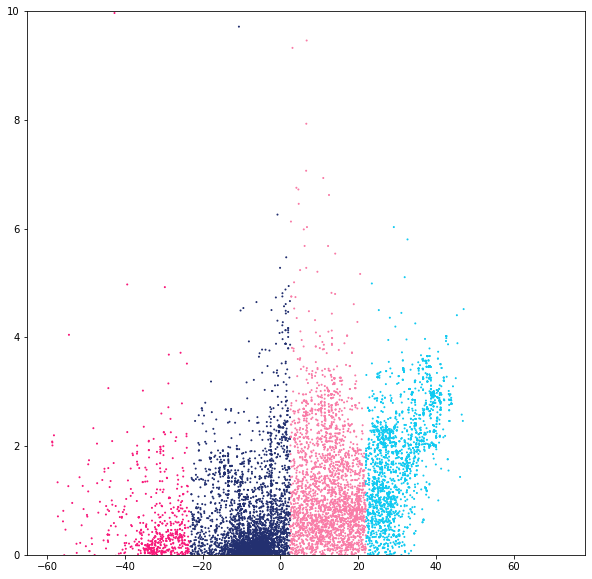

In [23]:
plt.rcParams["figure.figsize"]=10,10
cmap = np.array([ np.random.choice(range(256), size=3)/256 for j in range(len(label))])
plt.ylim(top=10)
plt.scatter(pca_2_result[:,0], pca_2_result[:,1], s=1, c=cmap[label])

Let's see an summary of the outliers of each cluster

In [24]:
X_with_labels = X.copy()
X_with_labels["labels"] = label
X_with_labels["product_name"] = dataset["product_name"]

(X_with_labels[X_with_labels["labels"]==0])[[
    "energy-kcal_100g",
    "energy_100g",
    "fat_100g",
    "saturated-fat_100g",
    "carbohydrates_100g",
    "sugars_100g",
    "fiber_100g",
    "proteins_100g",
    "salt_100g",
    "sodium_100g"
]].head()

for col in X.columns:
    print(col)
    for _ in set(label):
        print(f"\tLabel {_}")

#         Median
        print(f"\t\tMedian = {(X_with_labels[X_with_labels['labels']==_])[[ col ]].median()[0] }" )

#         Min    
        print(f"\t\tMin = { (X_with_labels[X_with_labels['labels']==_])[[ col ]].min()[0] }")
        for product in ( X_with_labels[ (X_with_labels[ col ] == (X_with_labels[X_with_labels["labels"]==_])[[ col ]].min()[0] ) & (X_with_labels["labels"]==_) ] )["product_name"]:
            product_line = dataset[ dataset['product_name'] == product]
            print(f"\t\t\t{product_line['product_name'].values[0]}")
            for column in dataset.columns.tolist():
                print(f"\t\t\t\t{column} : {product_line[column].values[0]}")
            break
            

#         Max
        print(f"\t\tMax = { (X_with_labels[X_with_labels['labels']==_])[[ col ]].max()[0] }")
        for product in ( X_with_labels[ (X_with_labels[ col ] == (X_with_labels[X_with_labels["labels"]==_])[[ col ]].max()[0] ) & (X_with_labels["labels"]==_) ] )["product_name"]:
            product_line = dataset[ dataset['product_name'] == product]
            print(f"\t\t\t{product_line['product_name'].values[0]}")
            for column in dataset.columns.tolist():
                print(f"\t\t\t\t{column} : {product_line[column].values[0]}")
            break

        print("----------")


    print("-------------------------------------------")

energy-kcal_100g
	Label 0
		Median = 5.942799375126701
		Min = 0.0
			Cereales soufflees Quinoa
				Unnamed: 0 : 12512
				product_name : Cereales soufflees Quinoa
				quantity : 260 g (9.17 oz)
				categories_tags : en:plant-based-foods-and-beverages,en:plant-based-foods,en:cereals-and-potatoes,en:breakfasts,en:cereals-and-their-products,en:breakfast-cereals
				labels_tags : en:gluten-free-vegan
				ingredients_text : organic white rice flour, organic quinoa flour, organic cane sugar and organic cocoa powd
				additives_n : 0.0
				additives_tags : nan
				nutriscore_score : 1.0
				nutriscore_grade : b
				nova_group : 1.0
				pnns_groups_1 : Cereals and potatoes
				pnns_groups_2 : Breakfast cereals
				ecoscore_score_fr : 44.0
				ecoscore_grade_fr : c
				main_category : en:breakfast-cereals
				energy-kcal_100g : 0.0
				energy_100g : 0.0
				fat_100g : 0.0
				saturated-fat_100g : 0.0
				carbohydrates_100g : 82.1
				sugars_100g : 35.7
				fiber_100g : 2.0
				proteins_100g : 

				main_category : en:peanut-butters
				energy-kcal_100g : 651.0
				energy_100g : 2724.0
				fat_100g : 53.45
				saturated-fat_100g : 11.47
				carbohydrates_100g : 18.23
				sugars_100g : 9.46
				fiber_100g : 4.75
				proteins_100g : 24.47
				salt_100g : 610.1842
				sodium_100g : 244.07368
				language : en
				ingredients_text_tokens : ['roast', 'pnuts', 'sugar', 'salt', 'fully', 'hydrogat', 'soya', 'oil']
----------
	Label 4
		Median = 5.58724865840025
		Min = -2.3025850929940455
			Golden wholemeal
				Unnamed: 0 : 1892
				product_name : Golden wholemeal
				quantity : 2.4 kg
				categories_tags : en:plant-based-foods-and-beverages,en:plant-based-foods,en:cereals-and-potatoes,en:cereals-and-their-products,en:flours,en:cereal-flours,en:wheat-flours,en:breads,en:bread-flours,en:sliced-breads,en:wheat-bread-flour
				labels_tags : nan
				ingredients_text : wht wholl 62%, triticale wholl, glut, non-iodis salt, ulsifi , malt flour, inactive yst, rosary tract, ascorc acid, zyme,

				quantity : nan
				categories_tags : en:plant-based-foods-and-beverages,en:plant-based-foods,en:cereals-and-potatoes,en:cereals-and-their-products,en:pie-dough
				labels_tags : nan
				ingredients_text : enrich flour (wht flour, niacin, ruc iron, vitamin  [thiamin mononitrate], vitamin  [riflavin], folic acid), palm and palm kn oil with tq for frhns, sugar, graham flour, corn syrup, molass, contains 2% or ls of salt, lving (king soda, sodium acid pyrophosphate, monocalcium phosphate), malt tract, soy lithin
				additives_n : 4.0
				additives_tags : en:e322,en:e322i,en:e341,en:e341i,en:e450,en:e450i,en:e500,en:e500ii
				nutriscore_score : 22.0
				nutriscore_grade : e
				nova_group : 4.0
				pnns_groups_1 : Cereals and potatoes
				pnns_groups_2 : Cereals
				ecoscore_score_fr : nan
				ecoscore_grade_fr : nan
				main_category : en:pie-dough
				energy-kcal_100g : 476.0
				energy_100g : 1992.0
				fat_100g : 23.81
				saturated-fat_100g : 14.29
				carbohydrates_100g : 66.67
	

		Median = 2.5
		Min = 0.0
			Creamy wheat cereal
				Unnamed: 0 : 1444
				product_name : Creamy wheat cereal
				quantity : nan
				categories_tags : en:plant-based-foods-and-beverages,en:plant-based-foods,en:cereals-and-potatoes,en:cereals-and-their-products
				labels_tags : nan
				ingredients_text : wht.
				additives_n : 0.0
				additives_tags : nan
				nutriscore_score : -3.0
				nutriscore_grade : a
				nova_group : 1.0
				pnns_groups_1 : Cereals and potatoes
				pnns_groups_2 : Cereals
				ecoscore_score_fr : nan
				ecoscore_grade_fr : nan
				main_category : en:cereals-and-their-products
				energy-kcal_100g : 360.0
				energy_100g : 1506.0
				fat_100g : 0.0
				saturated-fat_100g : 0.0
				carbohydrates_100g : 78.0
				sugars_100g : 0.0
				fiber_100g : 2.0
				proteins_100g : 12.0
				salt_100g : 0.0
				sodium_100g : 0.0
				language : en
				ingredients_text_tokens : ['wht']
		Max = 33.33
			Graham Cracker Pie Crust
				Unnamed: 0 : 47563
				product_name : Graham Cra

				energy-kcal_100g : 594.0
				energy_100g : 2485.0
				fat_100g : 50.0
				saturated-fat_100g : 9.38
				carbohydrates_100g : 18.75
				sugars_100g : 9.38
				fiber_100g : 6.2
				proteins_100g : 21.88
				salt_100g : 1.19126
				sodium_100g : 0.476504
				language : en
				ingredients_text_tokens : ['roast', 'pnuts', 'sugar', 'hydrogat', 'vae', 'oil', 'cottonsd', 'soyan', 'and', 'rapd', 'oil', 'to', 'prt', 'saration', 'salt']
----------
	Label 1
		Median = 0.0
		Min = 0.0
			Augason Farms, Vital Wheat Gluten
				Unnamed: 0 : 1452
				product_name : Augason Farms, Vital Wheat Gluten
				quantity : nan
				categories_tags : en:plant-based-foods-and-beverages,en:plant-based-foods,en:cereals-and-potatoes,en:cereals-and-their-products
				labels_tags : nan
				ingredients_text : vital wht glut.
				additives_n : 0.0
				additives_tags : nan
				nutriscore_score : -1.0
				nutriscore_grade : a
				nova_group : nan
				pnns_groups_1 : Cereals and potatoes
				pnns_groups_2 : Cereals
				e

				energy-kcal_100g : 519.0
				energy_100g : 2171.0
				fat_100g : 44.44
				saturated-fat_100g : 40.74
				carbohydrates_100g : 33.33
				sugars_100g : 18.52
				fiber_100g : 7.4
				proteins_100g : 3.7
				salt_100g : 0.14
				sodium_100g : 0.056
				language : en
				ingredients_text_tokens : ['coconut', 'coconut', 'ntar', 'appl', 'sunflow', 'sds', 'pumpkin', 'sds', 'cinnamon', 'vanilla', 'tract']
----------
-------------------------------------------
carbohydrates_100g
	Label 0
		Median = 82.76
		Min = 69.090909090909
			Melange à crêpes
				Unnamed: 0 : 33932
				product_name : Melange à crêpes
				quantity : 500g
				categories_tags : en:plant-based-foods-and-beverages,en:plant-based-foods,en:cereals-and-potatoes,en:seeds,en:cereals-and-their-products,en:cereal-grains,en:avena,en:oat,fr:melange-a-crepes
				labels_tags : en:organic,en:canada-organic
				ingredients_text : sifted wheat flour, *oat flour, *cream of wheat, baking powder seasalt. *stoneground and organic) may conta

				pnns_groups_1 : Cereals and potatoes
				pnns_groups_2 : Bread
				ecoscore_score_fr : nan
				ecoscore_grade_fr : nan
				main_category : en:white-breads
				energy-kcal_100g : 220.0
				energy_100g : 920.0
				fat_100g : 0.0
				saturated-fat_100g : 0.0
				carbohydrates_100g : 43.9
				sugars_100g : 0.0
				fiber_100g : 2.4
				proteins_100g : 7.32
				salt_100g : 1.1575
				sodium_100g : 0.463
				language : en
				ingredients_text_tokens : ['wht', 'flour', 'malt', 'rl', 'flour', 'wat', 'salt', 'yst']
----------
	Label 4
		Median = 49.04
		Min = 30.43
			Mini nutty pumpkin bread., nutty pumpkin
				Unnamed: 0 : 29938
				product_name : Mini nutty pumpkin bread., nutty pumpkin
				quantity : nan
				categories_tags : en:plant-based-foods-and-beverages,en:plant-based-foods,en:cereals-and-potatoes,en:breads
				labels_tags : nan
				ingredients_text : pumpkin, gs, cash flour, hon, maple syrup, pan ml, gold flaxsd ml, pans, ls than 2% of: coconut flour, king soda, crm of tartar, ci

				energy-kcal_100g : 379.0
				energy_100g : 1586.0
				fat_100g : 10.29
				saturated-fat_100g : 1.47
				carbohydrates_100g : 61.76
				sugars_100g : 61.76
				fiber_100g : 2.9
				proteins_100g : 7.35
				salt_100g : 1.3225
				sodium_100g : 0.529
				language : en
				ingredients_text_tokens : ['non-gmo', 'rich', 'unch', 'wht', 'flour', 'wht', 'flour', 'malt', 'rl', 'flour', 'niacin', 'ruc', 'iron', 'thiamin', 'mononitrate', 'riflavin', 'folic', 'acid', 'ascorc', 'acid', 'non-gmo', 'canola', 'oil', 'wat', 'cane', 'sugar', 'van', 'procs', 'salt', 'yst', 'sodium', 'hydroxide', 'calcium', 'sulfate', 'wht', 'starch', 'wht', 'flour', 'and', '%', 'or', 'ls', 'of', 'ch', 'of', 'the', 'following', 'zym', 'contains', 'wht', 'salt']
----------
	Label 3
		Median = 8.74
		Min = 5.63
			White Bread
				Unnamed: 0 : 19224
				product_name : White Bread
				quantity : nan
				categories_tags : en:plant-based-foods-and-beverages,en:plant-based-foods,en:cereals-and-potatoes,en:breads,en:white-bre

				pnns_groups_1 : Cereals and potatoes
				pnns_groups_2 : Cereals
				ecoscore_score_fr : 15.0
				ecoscore_grade_fr : e
				main_category : en:chia
				energy-kcal_100g : 499.0
				energy_100g : 2088.0
				fat_100g : 25.0
				saturated-fat_100g : 0.0
				carbohydrates_100g : 0.0
				sugars_100g : 0.0
				fiber_100g : 42.0
				proteins_100g : 25.0
				salt_100g : 0.0
				sodium_100g : 0.0
				language : en
				ingredients_text_tokens : ['get', 'creative', 'with', 'add', 'to', 'your', 'smooth', 'fruit-infused', 'waters', 'mix', 'with', 'aimond', 'or', 'for', 'a', 'tasty', 'spread', 'sprinkle', 'a', 'spoonful', 'oatmeal', 'yogurt', 'sa', 'bake', 'them', 'into', 'brea', 'cookies', 'toi', 'use', 'to', 'thicken', 'soup', 'gravies', 'dressings', 'make', 'your', 'favorite', 'marmelade', 'with', 'chi', 'benefits', 'of', 'chia', 'se', 'high', 'in', 'omega', 'a', 'magnesium', 'zinc', 'protein', 'fiber', 'may', 'promote', 'health', 'bones', 'digestion', 'imported', 'by', 'bija', 'orange', 'ca'

				energy-kcal_100g : 594.0
				energy_100g : 2485.0
				fat_100g : 50.0
				saturated-fat_100g : 9.38
				carbohydrates_100g : 18.75
				sugars_100g : 9.38
				fiber_100g : 6.2
				proteins_100g : 21.88
				salt_100g : 1.19126
				sodium_100g : 0.476504
				language : en
				ingredients_text_tokens : ['roast', 'pnuts', 'sugar', 'hydrogat', 'vae', 'oil', 'cottonsd', 'soyan', 'and', 'rapd', 'oil', 'to', 'prt', 'saration', 'salt']
----------
	Label 1
		Median = 5.38
		Min = 0.0
			Rice cakes
				Unnamed: 0 : 4697
				product_name : Rice cakes
				quantity : nan
				categories_tags : en:plant-based-foods-and-beverages,en:plant-based-foods,en:cereals-and-potatoes,en:cereals-and-their-products,en:puffed-cereal-cakes,en:puffed-rice-cakes
				labels_tags : en:no-gluten
				ingredients_text : source of fibre sv 3 - ch cake provid engy} fai isaturatsugars salt  i o. : &lt;o.lg ko.lg &lt;o.lg
				additives_n : 0.0
				additives_tags : nan
				nutriscore_score : 8.0
				nutriscore_grade : c
				

				labels_tags : en:no-gluten
				ingredients_text : only 134 calories sov ptotn ct se, tlavour th a chocolate greoltnîs p stav. p fie. ssomng cocoa qm). chocolate (milh), natutal flavounnq). oil .pd 011. natural p protn date. cocoa malt rulat0' acid). sugar. salt .vouonq. sw•t (st401 glycosid\ .ttrgy aovtce i alls. s inqrt•dits 'n ld made in a whlch handl milk. pack ln a tactory uch handl not'. orage ove ln cool place.
				additives_n : 0.0
				additives_tags : nan
				nutriscore_score : 1.0
				nutriscore_grade : b
				nova_group : nan
				pnns_groups_1 : Cereals and potatoes
				pnns_groups_2 : Breakfast cereals
				ecoscore_score_fr : 40.0
				ecoscore_grade_fr : c
				main_category : en:breakfast-cereals
				energy-kcal_100g : 394.0
				energy_100g : 1648.0
				fat_100g : 4.0
				saturated-fat_100g : 0.2
				carbohydrates_100g : 38.0
				sugars_100g : 7.0
				fiber_100g : 2.3
				proteins_100g : 48.1
				salt_100g : 0.9
				sodium_100g : 0.36
				language : en
				ingredients_tex

				energy-kcal_100g : 164.0
				energy_100g : 686.0
				fat_100g : 0.61
				saturated-fat_100g : 0.0
				carbohydrates_100g : 36.36
				sugars_100g : 8.48
				fiber_100g : 1.2
				proteins_100g : 4.85
				salt_100g : 1139.1519
				sodium_100g : 455.66076
				language : en
				ingredients_text_tokens : ['%', 'potato', 'pur', 'ronstitut', 'potato', 'with', 'wat', 'wht', 'flour', 'potato', 'starch', 'cooking', 'salt', 'potassium', 'sorte', 'lactic', 'acid', 'aromatic', 'h', 'spic', 'dust', 'with', 'rice', 'flour']
----------
	Label 4
		Median = 1.14
		Min = 0.0
			Multigrain Spaghetti Noodles
				Unnamed: 0 : 14291
				product_name : Multigrain Spaghetti Noodles
				quantity : nan
				categories_tags : en:plant-based-foods-and-beverages,en:plant-based-foods,en:cereals-and-potatoes,en:cereals-and-their-products,en:pastas
				labels_tags : nan
				ingredients_text : enrich solina (iron [frous sulfate] and b vitamins (niacin, thiamin mononitrate. riflavin, folic acid]), modifi wht starch, w

				Unnamed: 0 : 5811
				product_name : Extra Wide Egg Noodles
				quantity : nan
				categories_tags : nan
				labels_tags : nan
				ingredients_text : durum flour (wht), g yolks or gs, niacin, frous sulfate (iron), thiamin mononitrate (vitamin ), riflavin (vitamin ), and folic acid.
				additives_n : 0.0
				additives_tags : nan
				nutriscore_score : nan
				nutriscore_grade : nan
				nova_group : nan
				pnns_groups_1 : unknown
				pnns_groups_2 : unknown
				ecoscore_score_fr : nan
				ecoscore_grade_fr : nan
				main_category : nan
				energy-kcal_100g : 382.0
				energy_100g : 1598.0
				fat_100g : 4.55
				saturated-fat_100g : 0.91
				carbohydrates_100g : 70.91
				sugars_100g : 3.64
				fiber_100g : 3.6
				proteins_100g : 14.55
				salt_100g : 0.09144
				sodium_100g : 0.036576
				language : en
				ingredients_text_tokens : ['durum', 'flour', 'wht', 'g', 'yolks', 'or', 'gs', 'niacin', 'frous', 'sulfate', 'iron', 'thiamin', 'mononitrate', 'vitamin', 'riflavin', 'vitamin', '

### Sugary snacks
We tried the same approach on sugary snacks

In [25]:
X = (dataset[dataset["pnns_groups_1"]=="Sugary snacks"])[[
    "energy-kcal_100g",
    "energy_100g",
    "fat_100g",
    "saturated-fat_100g",
    "carbohydrates_100g",
    "sugars_100g",
    "fiber_100g",
    "proteins_100g",
    "salt_100g",
    "sodium_100g"
]]

In [26]:
X["energy-kcal_100g"] = X["energy-kcal_100g"].apply(lambda x : math.log(x) if x!=0 else 0)
X["energy_100g"] = X["energy_100g"].apply(lambda x : math.log(x) if x!=0 else 0)

In [27]:
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(X)
print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

Explained variation per principal component: [0.48366085 0.21454147]
Cumulative variance explained by 2 principal components: 69.82%


In [28]:
model=KMeans(5)
label = model.fit_predict(pca_2_result)

Display result

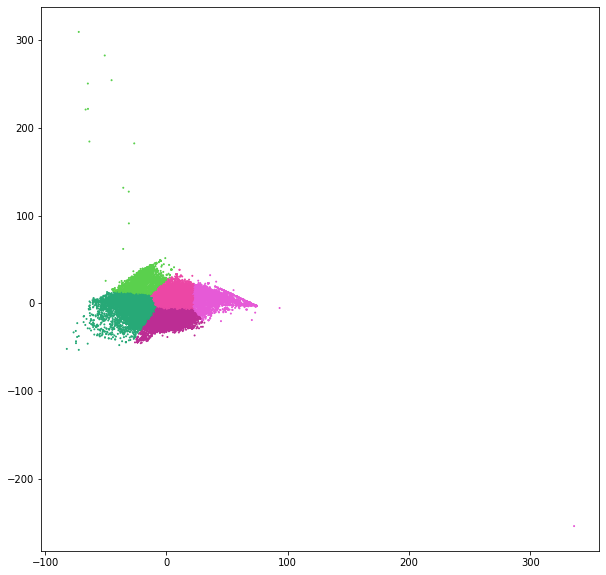

In [29]:
plt.rcParams["figure.figsize"]=10,10
cmap = np.array([ np.random.choice(range(256), size=3)/256 for j in range(len(label))])
plt.scatter(pca_2_result[:,0], pca_2_result[:,1], s=1, c=cmap[label])

Let's see an summary of the outliers of each cluster

In [30]:
X_with_labels = X.copy()
X_with_labels["labels"] = label
X_with_labels["product_name"] = dataset["product_name"]

(X_with_labels[X_with_labels["labels"]==0])[[
    "energy-kcal_100g",
    "energy_100g",
    "fat_100g",
    "saturated-fat_100g",
    "carbohydrates_100g",
    "sugars_100g",
    "fiber_100g",
    "proteins_100g",
    "salt_100g",
    "sodium_100g"
]].head()

for col in X.columns:
    print(col)
    for _ in set(label):
        print(f"\tLabel {_}")

#         Median
        print(f"\t\tMedian = {(X_with_labels[X_with_labels['labels']==_])[[ col ]].median()[0] }" )

#         Min    
        print(f"\t\tMin = { (X_with_labels[X_with_labels['labels']==_])[[ col ]].min()[0] }")
        for product in ( X_with_labels[ (X_with_labels[ col ] == (X_with_labels[X_with_labels["labels"]==_])[[ col ]].min()[0] ) & (X_with_labels["labels"]==_) ] )["product_name"]:
            product_line = dataset[ dataset['product_name'] == product]
            print(f"\t\t\t{product_line['product_name'].values[0]}")
            for column in dataset.columns.tolist():
                print(f"\t\t\t\t{column} : {product_line[column].values[0]}")
            break
            

#         Max
        print(f"\t\tMax = { (X_with_labels[X_with_labels['labels']==_])[[ col ]].max()[0] }")
        for product in ( X_with_labels[ (X_with_labels[ col ] == (X_with_labels[X_with_labels["labels"]==_])[[ col ]].max()[0] ) & (X_with_labels["labels"]==_) ] )["product_name"]:
            product_line = dataset[ dataset['product_name'] == product]
            print(f"\t\t\t{product_line['product_name'].values[0]}")
            for column in dataset.columns.tolist():
                print(f"\t\t\t\t{column} : {product_line[column].values[0]}")
            break

        print("----------")


    print("-------------------------------------------")

energy-kcal_100g
	Label 0
		Median = 6.0014148779611505
		Min = -3.3242363405260273
			Gluten Free Deli Wafers
				Unnamed: 0 : 25873
				product_name : Gluten Free Deli Wafers
				quantity : 150gm
				categories_tags : en:snacks,en:sweet-snacks,en:biscuits-and-cakes,en:biscuits,en:wafers
				labels_tags : en:gliten-free
				ingredients_text : tapioca starch, rice flour, maize starch, poppy sds:1%, lodis salt, tasty chse powd (((milk solids,chse solids(pastris milk,start culture, enzym),salt,food acid(citric acid))),emulsifi (471),canola oil (non gmo), vae gum (415).raising agt (e500).acidity rulator (e330). allgy advice contains milk products from cheese. manufactured in a factory that contains nuts and sesame seeds.
				additives_n : 3.0
				additives_tags : en:e330,en:e471,en:e500
				nutriscore_score : 0.0
				nutriscore_grade : b
				nova_group : 4.0
				pnns_groups_1 : Sugary snacks
				pnns_groups_2 : Biscuits and cakes
				ecoscore_score_fr : 55.0
				ecoscore_grade_fr : c
				

		Median = 6.214608098422191
		Min = 0.0
			M&M’s
				Unnamed: 0 : 43706
				product_name : M&M’s
				quantity : nan
				categories_tags : en:snacks,en:sweet-snacks,en:confectioneries
				labels_tags : nan
				ingredients_text : milk chocolate (sugar, chocolate, skim milk, cocoa tt, lactose, milkfat, pnuts, soy lithin, salt, artificial and natural flavors), sugar, pnuts, cornstarch, ls than 1% - palm oil, corn syrup, dtrin, coloring (includ ylow 5, ue 1, r 40, ylow 6, ylow 5 lake, ue 1 lake, r 40 lake, ylow 6 lake, ue 2 lake, ue 2), carnau wax, gum acacia.
				additives_n : 9.0
				additives_tags : en:e102,en:e110,en:e129,en:e132,en:e133,en:e1400,en:e322,en:e322i,en:e414,en:e903
				nutriscore_score : 17.0
				nutriscore_grade : d
				nova_group : 4.0
				pnns_groups_1 : Sugary snacks
				pnns_groups_2 : Sweets
				ecoscore_score_fr : nan
				ecoscore_grade_fr : nan
				main_category : en:confectioneries
				energy-kcal_100g : 0.0
				energy_100g : 0.0
				fat_100g : 25.0
				saturated

				energy-kcal_100g : 1870.0
				energy_100g : 7800.0
				fat_100g : 6.67
				saturated-fat_100g : 3.33
				carbohydrates_100g : 93.3
				sugars_100g : 3.33
				fiber_100g : 0.0
				proteins_100g : 3.33
				salt_100g : 0.667
				sodium_100g : 0.267
				language : en
				ingredients_text_tokens : ['crm', 'milk', 'butt', 'milk', 'acids', 'lactic', 'acid', 'sodium', 'lactate', 'palm', 'fat', 'colours', 'titanium', 'dioxide', 'paprika', 'extract', 'emulsifi', 'soya', 'lithins', 'salt', 'natural', 'flavouring', 'natural', 'strawrry', 'flavouring', 'with', 'oth', 'natural', 'flavouring', 'contains', 'caffne', 'conctrat', 'fruit', 'juic', 'eldrry', 'strawrry', 'swts', 'isomalt', 'sucralose', '%']
----------
	Label 3
		Median = 7.462214939768189
		Min = 0.0
			Stevia zero calorie sweetener, stevia
				Unnamed: 0 : 42174
				product_name : Stevia zero calorie sweetener, stevia
				quantity : nan
				categories_tags : en:sweeteners,en:sugars
				labels_tags : nan
				ingredients_text : erythrit

				Unnamed: 0 : 42528
				product_name : Oreo Crispy&Thin
				quantity : 16 p
				categories_tags : en:snacks,en:sweet-snacks,en:biscuits-and-cakes,en:biscuits
				labels_tags : nan
				ingredients_text : sugar, wht flow, palm oil, low fat cocoa 4.3%, wht starch, glucose-fructose syrup, raising agts, salt, ulsifi, vanilla flavoring
				additives_n : 0.0
				additives_tags : nan
				nutriscore_score : 24.0
				nutriscore_grade : e
				nova_group : nan
				pnns_groups_1 : Sugary snacks
				pnns_groups_2 : Biscuits and cakes
				ecoscore_score_fr : 38.0
				ecoscore_grade_fr : d
				main_category : en:biscuits
				energy-kcal_100g : 118.0
				energy_100g : 494.0
				fat_100g : 50.0
				saturated-fat_100g : 24.0
				carbohydrates_100g : 170.0
				sugars_100g : 95.0
				fiber_100g : 6.0
				proteins_100g : 12.0
				salt_100g : 2.0
				sodium_100g : 0.8
				language : en
				ingredients_text_tokens : ['sugar', 'wht', 'flow', 'palm', 'oil', 'low', 'fat', 'cocoa', '%', 'wht', 'starch', 'gluco

		Max = 61.9
			Keto cups + coffee
				Unnamed: 0 : 24334
				product_name : Keto cups + coffee
				quantity : nan
				categories_tags : en:snacks,en:sweet-snacks,en:confectioneries
				labels_tags : nan
				ingredients_text : organic coconut tt, organic cacao*, organic cacao tt, mct oil, organic coff, organic monk fruit
				additives_n : 0.0
				additives_tags : nan
				nutriscore_score : 13.0
				nutriscore_grade : d
				nova_group : 3.0
				pnns_groups_1 : Sugary snacks
				pnns_groups_2 : Sweets
				ecoscore_score_fr : nan
				ecoscore_grade_fr : nan
				main_category : en:confectioneries
				energy-kcal_100g : 667.0
				energy_100g : 2791.0
				fat_100g : 71.43
				saturated-fat_100g : 61.9
				carbohydrates_100g : 19.05
				sugars_100g : 0.0
				fiber_100g : 14.3
				proteins_100g : 4.76
				salt_100g : 0.0
				sodium_100g : 0.0
				language : en
				ingredients_text_tokens : ['organic', 'coconut', 'tt', 'organic', 'cacao', 'organic', 'cacao', 'tt', 'mct', 'oil', 'organic', 'coff

		Max = 77.0
			Zoom
				Unnamed: 0 : 5705
				product_name : Zoom
				quantity : 2019/8/25
				categories_tags : en:spreads,en:breakfasts,en:bee-products,en:farming-products,en:sweet-spreads,en:sweeteners,en:honeys,en:white-honeys-from-tigrai
				labels_tags : en:organic,en:eu-organic,en:hr-eko-07
				ingredients_text : hunpre handy krde  1 jan 00.0802 015 (ae-ba8 wm 100 infut 4 res ph ha h pro mandy rard ww
				additives_n : 0.0
				additives_tags : nan
				nutriscore_score : nan
				nutriscore_grade : nan
				nova_group : nan
				pnns_groups_1 : Sugary snacks
				pnns_groups_2 : Sweets
				ecoscore_score_fr : 84.0
				ecoscore_grade_fr : b
				main_category : en:white-honeys-from-tigrai
				energy-kcal_100g : 300.0
				energy_100g : 1255.0
				fat_100g : 44.0
				saturated-fat_100g : 77.0
				carbohydrates_100g : 100.0
				sugars_100g : 70.0
				fiber_100g : 80.0
				proteins_100g : 65.0
				salt_100g : 23.0
				sodium_100g : 9.2
				language : en
				ingredients_text_tokens : ['hun

		Max = 100.0
			Soft candy puffs
				Unnamed: 0 : 30879
				product_name : Soft candy puffs
				quantity : nan
				categories_tags : en:snacks,en:sweet-snacks,en:confectioneries
				labels_tags : nan
				ingredients_text : pure cane sugar, dark chocolate (sugar, chocolate liquor, cocoa tt, anhydrous milkfat, soy lithin (an ulsifi), vanilla), invt sugar, conftion's glaze oil of ppmint.
				additives_n : 1.0
				additives_tags : en:e322,en:e322i
				nutriscore_score : 25.0
				nutriscore_grade : e
				nova_group : 4.0
				pnns_groups_1 : Sugary snacks
				pnns_groups_2 : Sweets
				ecoscore_score_fr : nan
				ecoscore_grade_fr : nan
				main_category : en:confectioneries
				energy-kcal_100g : 500.0
				energy_100g : 2092.0
				fat_100g : 15.62
				saturated-fat_100g : 9.38
				carbohydrates_100g : 81.25
				sugars_100g : 75.0
				fiber_100g : 0.0
				proteins_100g : 0.0
				salt_100g : 0.0
				sodium_100g : 0.0
				language : en
				ingredients_text_tokens : ['pure', 'cane', 'sugar', '

		Max = 57.5
			Bobbin gold twin
				Unnamed: 0 : 38344
				product_name : Bobbin gold twin
				quantity : 40 g
				categories_tags : en:snacks,en:sweet-snacks,en:cocoa-and-its-products,en:confectioneries,en:bars,en:chocolate-candies,en:chocolate-bars
				labels_tags : nan
				ingredients_text : ingredients: sugar 42.4% palm kernel fat 29.3% milk powder 14.4% cocoa 6.8% chocolate 6.4% lecithin 0.4% artificial flavours
				additives_n : 0.0
				additives_tags : nan
				nutriscore_score : 36.0
				nutriscore_grade : e
				nova_group : nan
				pnns_groups_1 : Sugary snacks
				pnns_groups_2 : Biscuits and cakes
				ecoscore_score_fr : nan
				ecoscore_grade_fr : nan
				main_category : en:chocolate-bars
				energy-kcal_100g : 550.0
				energy_100g : 2300.0
				fat_100g : 30.0
				saturated-fat_100g : 27.5
				carbohydrates_100g : 62.5
				sugars_100g : 57.5
				fiber_100g : 0.0
				proteins_100g : 5.0
				salt_100g : 286.0
				sodium_100g : 114.0
				language : en
				ingredients_text_tok

		Median = 0.0
		Min = 0.0
			Candy crush, fruit snacks
				Unnamed: 0 : 1256
				product_name : Candy crush, fruit snacks
				quantity : nan
				categories_tags : en:snacks,en:sweet-snacks,en:confectioneries
				labels_tags : nan
				ingredients_text : sugar, white grape juice from conctrate, corn syrup, modifi corn starch, gatin, citric acid, ascorc acid (vitamin c), apple pur, natural & artificial flavors, sodium citrate, carnau wax, artificial colors (fd&c ylow 6, r 40, ue 1, ylow 5).
				additives_n : 8.0
				additives_tags : en:e102,en:e110,en:e129,en:e133,en:e330,en:e331,en:e428,en:e903
				nutriscore_score : 13.0
				nutriscore_grade : d
				nova_group : 4.0
				pnns_groups_1 : Sugary snacks
				pnns_groups_2 : Sweets
				ecoscore_score_fr : nan
				ecoscore_grade_fr : nan
				main_category : en:confectioneries
				energy-kcal_100g : 309.0
				energy_100g : 1293.0
				fat_100g : 0.0
				saturated-fat_100g : 0.0
				carbohydrates_100g : 74.96
				sugars_100g : 57.32
				fiber_10

	Label 0
		Median = 5.12410256410255
		Min = 0.0
			Jelly Fish
				Unnamed: 0 : 1258
				product_name : Jelly Fish
				quantity : 3 oz
				categories_tags : en:snacks,en:sweet-snacks,en:confectioneries,en:candies
				labels_tags : nan
				ingredients_text : sugar, corn syrup, modifi corn starch, citrict acid, sodium citrate, natural and artificial flavours, minal oil, carnau wax, r 40, ylow 6, ylow 5, ue 1.
				additives_n : 7.0
				additives_tags : en:e102,en:e110,en:e129,en:e133,en:e331,en:e903,en:e905,en:e905a
				nutriscore_score : 6.0
				nutriscore_grade : c
				nova_group : 4.0
				pnns_groups_1 : Sugary snacks
				pnns_groups_2 : Sweets
				ecoscore_score_fr : 14.0
				ecoscore_grade_fr : e
				main_category : en:candies
				energy-kcal_100g : 140.0
				energy_100g : 586.0
				fat_100g : 0.0
				saturated-fat_100g : 0.0
				carbohydrates_100g : 34.0
				sugars_100g : 24.0
				fiber_100g : 0.0
				proteins_100g : 0.0
				salt_100g : 0.0762
				sodium_100g : 0.03048
				language 

				energy-kcal_100g : 357.0
				energy_100g : 1494.0
				fat_100g : 7.14
				saturated-fat_100g : 3.57
				carbohydrates_100g : 71.43
				sugars_100g : 39.29
				fiber_100g : 3.6
				proteins_100g : 0.0
				salt_100g : 1.0275
				sodium_100g : 0.411
				language : en
				ingredients_text_tokens : ['enrich', 'ch', 'flour', 'wht', 'flour', 'niacin', 'ruc', 'iron', 'thiamin', 'mononitrate', 'riflavin', 'folic', 'acid', 'high', 'fructose', 'corn', 'syrup', 'figs', 'figs', 'sulfur', 'dioxide', 'prvative', 'corn', 'syrup', 'sugar', 'dtrose', 'corn', 'flour', 'palm', 'oil', 'flak', 'corn', 'salt', 'king', 'soda', 'prvativ', 'potassium', 'sorte', 'sodium', 'nzoate', 'canola', 'oil', 'caram', 'color', 'soy', 'lithin', 'citric', 'acid', 'natural', 'flavor', 'annatto', 'for', 'color']
		Max = 33.33
			Meringue powder
				Unnamed: 0 : 16447
				product_name : Meringue powder
				quantity : nan
				categories_tags : en:biscuits-and-cakes,en:cooking-helpers,en:cakes,en:dessert-mixes,en:pastry-helpe

				Unnamed: 0 : 8754
				product_name : Kroger, zero calorie sweetener
				quantity : nan
				categories_tags : en:sweeteners,en:sugars
				labels_tags : nan
				ingredients_text : erythritol, r a*, natural flavors.
				additives_n : 1.0
				additives_tags : en:e968
				nutriscore_score : 0.0
				nutriscore_grade : b
				nova_group : 4.0
				pnns_groups_1 : Sugary snacks
				pnns_groups_2 : Sweets
				ecoscore_score_fr : 74.0
				ecoscore_grade_fr : b
				main_category : en:sugars
				energy-kcal_100g : 0.0
				energy_100g : 0.0
				fat_100g : 0.0
				saturated-fat_100g : 0.0
				carbohydrates_100g : 100.0
				sugars_100g : 0.0
				fiber_100g : 0.0
				proteins_100g : 0.0
				salt_100g : 0.0
				sodium_100g : 0.0
				language : en
				ingredients_text_tokens : ['erythritol', 'r', 'a', 'natural', 'flavors']
		Max = 1098.37728
			Microwave cinnamon rolls with cream cheese icing, cinnamon
				Unnamed: 0 : 37422
				product_name : Microwave cinnamon rolls with cream cheese icing, cinnamon

				ecoscore_grade_fr : nan
				main_category : en:bonbons
				energy-kcal_100g : 639.0
				energy_100g : 2670.0
				fat_100g : 52.8
				saturated-fat_100g : 38.9
				carbohydrates_100g : 38.9
				sugars_100g : 30.6
				fiber_100g : 5.56
				proteins_100g : 5.56
				salt_100g : 104.0
				sodium_100g : 41.7
				language : en
				ingredients_text_tokens : ['sugar', 'chocolate', 'vae', 'oil', 'coconut', 'palm', 'kn', 'cocoa', 'nuli', 'cocot', 'powd', 'procs', 'with', 'alkali', 'milkfat', 'milk', 'skim', 'milk', 'soy', 'lithin', 'fulsifi', 'artificial', 'havors', 'vanilla', 'sds', 'rl', 'malt', 'powd', 'urn', 'vanilla', 'ans', 'may', 'contain', 'tr', 'nuts']
----------
	Label 1
		Median = 0.036
		Min = 0.0
			Hfb Candy, Candy Crush Color Bombs
				Unnamed: 0 : 1271
				product_name : Hfb Candy, Candy Crush Color Bombs
				quantity : nan
				categories_tags : en:snacks,en:sweet-snacks,en:confectioneries
				labels_tags : nan
				ingredients_text : sugar, assort nonparls (sugar, corn starch,

				energy-kcal_100g : 300.0
				energy_100g : 1255.0
				fat_100g : 44.0
				saturated-fat_100g : 77.0
				carbohydrates_100g : 100.0
				sugars_100g : 70.0
				fiber_100g : 80.0
				proteins_100g : 65.0
				salt_100g : 23.0
				sodium_100g : 9.2
				language : en
				ingredients_text_tokens : ['hunpre', 'handy', 'krde', 'jan', 'ae-ba', 'wm', 'infut', 'res', 'ph', 'ha', 'h', 'pro', 'mandy', 'rard', 'ww']
----------
-------------------------------------------


## DBSCAN
We tried another clustering approach

In [31]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [32]:
X = (dataset[dataset["pnns_groups_1"]=="Beverages"])[[
    "energy-kcal_100g",
    "energy_100g",
    "fat_100g",
    "saturated-fat_100g",
    "carbohydrates_100g",
    "sugars_100g",
    "fiber_100g",
    "proteins_100g",
    "salt_100g",
    "sodium_100g"
]]

In [33]:
X["energy-kcal_100g"] = X["energy-kcal_100g"].apply(lambda x : math.log(x) if x!=0 else 0)
X["energy_100g"] = X["energy_100g"].apply(lambda x : math.log(x) if x!=0 else 0)

In [34]:
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(X)
print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

Explained variation per principal component: [0.68116744 0.14733686]
Cumulative variance explained by 2 principal components: 82.85%


In [35]:
db = DBSCAN(eps=3.5, min_samples=5).fit(pca_2_result)

In [36]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 8
Estimated number of noise points: 81


Display some results

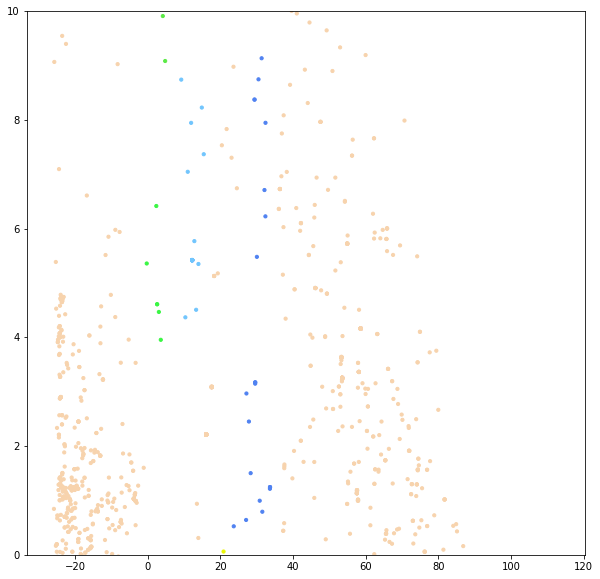

In [37]:
plt.rcParams["figure.figsize"]=10,10
cmap = np.array([ np.random.choice(range(256), size=3)/256 for j in range(len(labels))])
plt.ylim(top=10)
plt.scatter(pca_2_result[:,0], pca_2_result[:,1], s=10, c=cmap[labels])

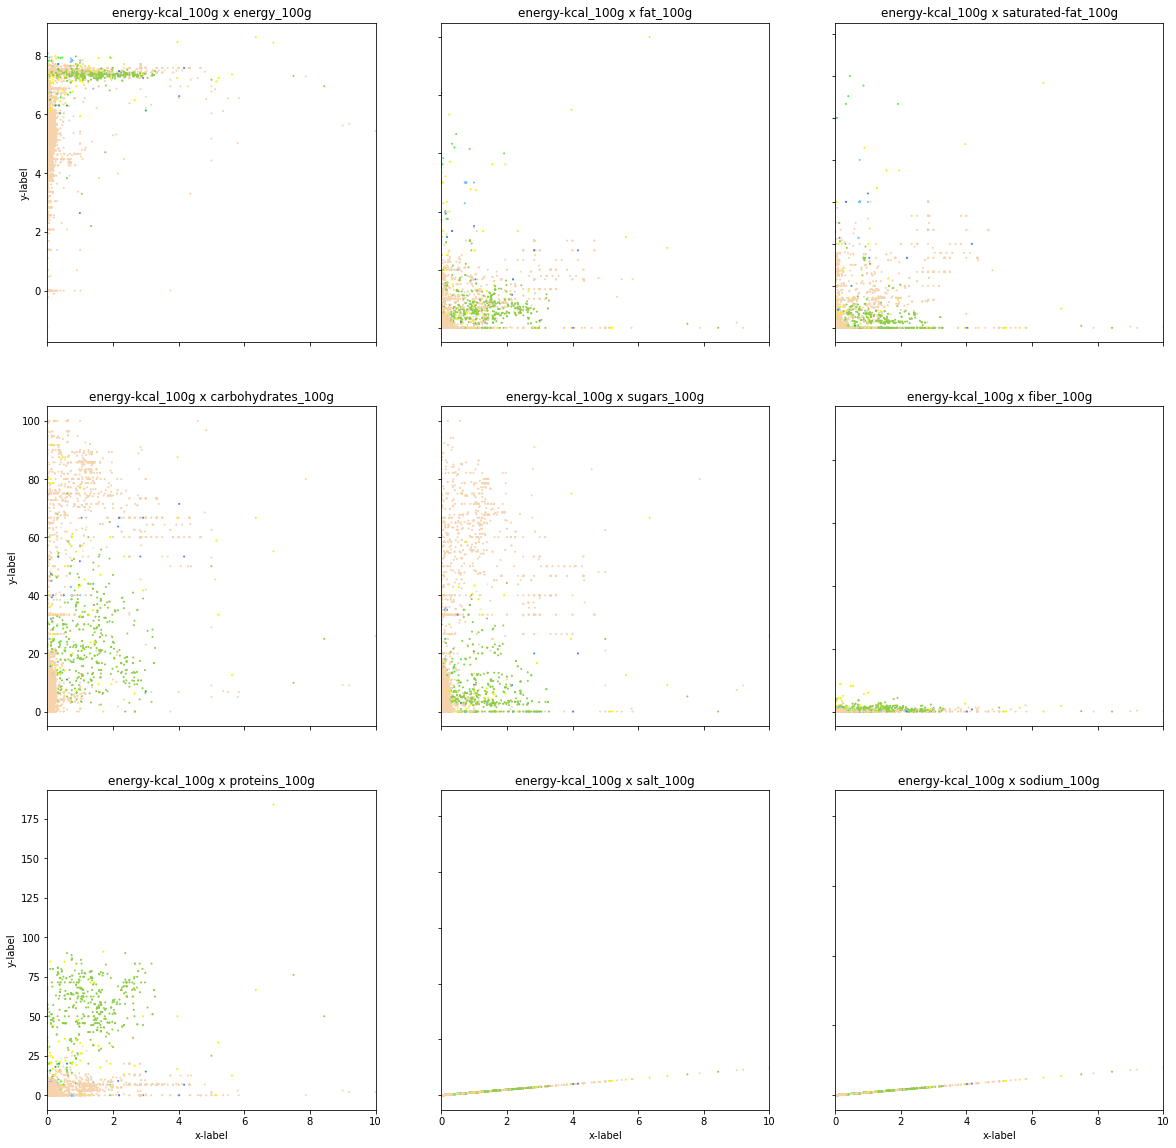

In [38]:
plt.rcParams["figure.figsize"]=20,20
fig, axs = plt.subplots(3, 3)
axs[0, 0].scatter(X["salt_100g"], X["energy_100g"], s=1, c=cmap[labels])
axs[0, 0].set_title('energy-kcal_100g x energy_100g')
axs[0, 1].scatter(X["salt_100g"], X["fat_100g"], s=1, c=cmap[labels])
axs[0, 1].set_title('energy-kcal_100g x fat_100g')
axs[0, 2].scatter(X["salt_100g"], X["saturated-fat_100g"], s=1, c=cmap[labels])
axs[0, 2].set_title('energy-kcal_100g x saturated-fat_100g')
axs[1, 0].scatter(X["salt_100g"], X["carbohydrates_100g"], s=1, c=cmap[labels])
axs[1, 0].set_title('energy-kcal_100g x carbohydrates_100g')
axs[1, 1].scatter(X["salt_100g"], X["sugars_100g"], s=1, c=cmap[labels])
axs[1, 1].set_title('energy-kcal_100g x sugars_100g')
axs[1, 2].scatter(X["salt_100g"], X["fiber_100g"], s=1, c=cmap[labels])
axs[1, 2].set_title('energy-kcal_100g x fiber_100g')
axs[2, 0].scatter(X["salt_100g"], X["proteins_100g"], s=1, c=cmap[labels])
axs[2, 0].set_title('energy-kcal_100g x proteins_100g')
axs[2, 1].scatter(X["salt_100g"], X["salt_100g"], s=1, c=cmap[labels])
axs[2, 1].set_title('energy-kcal_100g x salt_100g')
axs[2, 2].scatter(X["salt_100g"], X["sodium_100g"], s=1, c=cmap[labels])
axs[2, 2].set_title('energy-kcal_100g x sodium_100g')

for ligne in axs:
    for _ in ligne:
        _.set_xlim([0,10])

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Let's see a summary of the outliers of each cluster

In [39]:
X_with_labels = X.copy()
X_with_labels["labels"] = labels
X_with_labels["product_name"] = dataset["product_name"]

(X_with_labels[X_with_labels["labels"]==0])[[
    "energy-kcal_100g",
    "energy_100g",
    "fat_100g",
    "saturated-fat_100g",
    "carbohydrates_100g",
    "sugars_100g",
    "fiber_100g",
    "proteins_100g",
    "salt_100g",
    "sodium_100g"
]].head()

for col in X.columns:
    print(col)
    for _ in set(label):
        print(f"\tLabel {_}")

#         Median
        print(f"\t\tMedian = {(X_with_labels[X_with_labels['labels']==_])[[ col ]].median()[0] }" )

#         Min    
        print(f"\t\tMin = { (X_with_labels[X_with_labels['labels']==_])[[ col ]].min()[0] }")
        for product in ( X_with_labels[ (X_with_labels[ col ] == (X_with_labels[X_with_labels["labels"]==_])[[ col ]].min()[0] ) & (X_with_labels["labels"]==_) ] )["product_name"]:
            product_line = dataset[ dataset['product_name'] == product]
            print(f"\t\t\t{product_line['product_name'].values[0]}")
            for column in dataset.columns.tolist():
                print(f"\t\t\t\t{column} : {product_line[column].values[0]}")
            break
            

#         Max
        print(f"\t\tMax = { (X_with_labels[X_with_labels['labels']==_])[[ col ]].max()[0] }")
        for product in ( X_with_labels[ (X_with_labels[ col ] == (X_with_labels[X_with_labels["labels"]==_])[[ col ]].max()[0] ) & (X_with_labels["labels"]==_) ] )["product_name"]:
            product_line = dataset[ dataset['product_name'] == product]
            print(f"\t\t\t{product_line['product_name'].values[0]}")
            for column in dataset.columns.tolist():
                print(f"\t\t\t\t{column} : {product_line[column].values[0]}")
            break

        print("----------")


    print("-------------------------------------------")

energy-kcal_100g
	Label 0
		Median = 3.871201010907891
		Min = -2.995732273553991
			Knudsen juice very veggie low sodium organic
				Unnamed: 0 : 29146
				product_name : Knudsen juice very veggie low sodium organic
				quantity : nan
				categories_tags : en:plant-based-foods-and-beverages,en:beverages,en:plant-based-beverages
				labels_tags : nan
				ingredients_text : filt wat (sufficit to ronstitute), organic tomato paste, organic vae juice d (organic carrot, cy, parsl, , ltuce, watcrs, spinach), organic grain vinar, organic lon juice conctrate, organic dydrat grn ll pps.
				additives_n : 0.0
				additives_tags : nan
				nutriscore_score : 4.0
				nutriscore_grade : c
				nova_group : 1.0
				pnns_groups_1 : Beverages
				pnns_groups_2 : Unsweetened beverages
				ecoscore_score_fr : nan
				ecoscore_grade_fr : nan
				main_category : en:plant-based-beverages
				energy-kcal_100g : 0.05
				energy_100g : 0.0
				fat_100g : 0.0
				saturated-fat_100g : 0.0
				carbohydrates_100g :

		Min = 1.2378743560016274
			Mulit grain cheerios
				Unnamed: 0 : 27426
				product_name : Mulit grain cheerios
				quantity : nan
				categories_tags : en:beverages
				labels_tags : nan
				ingredients_text : sup wh protn d (wh protn isolate, wh protn conctrate), natural and artificial flavors, clulose gum, polyvinyl alcohol, soy lithin, silica, sunflow lithin, aculfame potassium, propyle glycol, vae glycin, wat, sucralose, xylitol, sortol, polysorte 80.
				additives_n : 10.0
				additives_tags : en:e1203,en:e1520,en:e322,en:e322i,en:e420,en:e422,en:e433,en:e466,en:e950,en:e955,en:e967
				nutriscore_score : 15.0
				nutriscore_grade : e
				nova_group : 4.0
				pnns_groups_1 : Beverages
				pnns_groups_2 : Artificially sweetened beverages
				ecoscore_score_fr : nan
				ecoscore_grade_fr : nan
				main_category : en:beverages
				energy-kcal_100g : 3.448275862069
				energy_100g : 14.0
				fat_100g : 5.1724137931034
				saturated-fat_100g : 0.0
				carbohydrates_100g : 51.7241379

		Median = 7.828038032125829
		Min = 6.54965074223381
			Original mix
				Unnamed: 0 : 40054
				product_name : Original mix
				quantity : nan
				categories_tags : en:beverages,en:dried-products,en:dried-products-to-be-rehydrated,en:dehydrated-beverages
				labels_tags : nan
				ingredients_text : chili pp powd, salt, sugar, citric acid, silicon dioxide (anticaking), high fructose corn syrup, polysorte 80, xanthan gum, propyle glycol alginate, vitamin c, sodium nzoate, potassium sorte. may contain ue poppy sd, ground cardamom, garlic powd, y lf ground, same sd powd.
				additives_n : 6.0
				additives_tags : en:e202,en:e211,en:e330,en:e405,en:e415,en:e433
				nutriscore_score : nan
				nutriscore_grade : nan
				nova_group : 4.0
				pnns_groups_1 : Beverages
				pnns_groups_2 : Sweetened beverages
				ecoscore_score_fr : nan
				ecoscore_grade_fr : nan
				main_category : en:dehydrated-beverages
				energy-kcal_100g : 167.0
				energy_100g : 699.0
				fat_100g : 10.0
				saturated-fa

				energy-kcal_100g : 600.0
				energy_100g : 2510.0
				fat_100g : 40.0
				saturated-fat_100g : 25.0
				carbohydrates_100g : 45.0
				sugars_100g : 25.0
				fiber_100g : 15.0
				proteins_100g : 10.0
				salt_100g : 0.125
				sodium_100g : 0.05
				language : en
				ingredients_text_tokens : ['organic', 'cocoa', 'ans', 'organic', 'coconut', 'sugar', 'organic', 'cocoa', 'tt', 'organic', 'coff', 'ans', 'organic', 'vanilla', 'an']
----------
	Label 2
		Median = 2.3049999999999997
		Min = 0.0
			Smoothie mix
				Unnamed: 0 : 14040
				product_name : Smoothie mix
				quantity : nan
				categories_tags : en:beverages,en:dried-products,en:dried-products-to-be-rehydrated,en:dehydrated-beverages
				labels_tags : nan
				ingredients_text : sugar, corn syrup solids, nonfat dry milk, natural and artificial flavor, xanthan gum,
				additives_n : 1.0
				additives_tags : en:e415
				nutriscore_score : nan
				nutriscore_grade : nan
				nova_group : 4.0
				pnns_groups_1 : Beverages
				pnns_gro

		Median = 1.28
		Min = 0.0
			Swiss miss, sensible sweets, light hot cocoa mix
				Unnamed: 0 : 27574
				product_name : Swiss miss, sensible sweets, light hot cocoa mix
				quantity : nan
				categories_tags : en:beverages,en:dried-products,en:dried-products-to-be-rehydrated,en:dehydrated-beverages
				labels_tags : nan
				ingredients_text : nonfat milk, cocoa (procs with alkali), calcium carnate, modifi wh, salt, ls than 2% of: carragnan, aculfame potassium, sucralose, natural and artificial flavors, milk, disodium phosphate, caram color.
				additives_n : 6.0
				additives_tags : en:e150c,en:e170,en:e170i,en:e339ii,en:e407,en:e950,en:e955
				nutriscore_score : nan
				nutriscore_grade : nan
				nova_group : 4.0
				pnns_groups_1 : Beverages
				pnns_groups_2 : Artificially sweetened beverages
				ecoscore_score_fr : nan
				ecoscore_grade_fr : nan
				main_category : en:dehydrated-beverages
				energy-kcal_100g : 312.0
				energy_100g : 1305.0
				fat_100g : 0.0
				saturated-fat

			seltzer water
				Unnamed: 0 : 5960
				product_name : seltzer water
				quantity : 12 fl oz
				categories_tags : en:beverages,en:carbonated-drinks,en:waters,en:carbonated-waters,en:flavored-waters,en:flavored-sparkling-waters
				labels_tags : nan
				ingredients_text : carnat wat, natural favors.
				additives_n : 0.0
				additives_tags : nan
				nutriscore_score : 1.0
				nutriscore_grade : b
				nova_group : 1.0
				pnns_groups_1 : Beverages
				pnns_groups_2 : Waters and flavored waters
				ecoscore_score_fr : nan
				ecoscore_grade_fr : nan
				main_category : en:flavored-sparkling-waters
				energy-kcal_100g : 0.2825
				energy_100g : 1.0
				fat_100g : 0.0
				saturated-fat_100g : 0.0
				carbohydrates_100g : 0.0
				sugars_100g : 0.0
				fiber_100g : 0.0
				proteins_100g : 0.0
				salt_100g : 0.00706225
				sodium_100g : 0.0028249
				language : en
				ingredients_text_tokens : ['carnat', 'wat', 'natural', 'favors']
		Max = 100.0
			Original fat free non-dairy coffee crea

		Max = 75.0
			Orange drink mix
				Unnamed: 0 : 39312
				product_name : Orange drink mix
				quantity : nan
				categories_tags : en:beverages,en:dried-products,en:dried-products-to-be-rehydrated,en:dehydrated-beverages
				labels_tags : nan
				ingredients_text : citric acid, calcium phosphate, maltodtrin, ascorc acid aspartame**, contains ls than 2% of calcium carnate, gum arac, aculfame potassium, xanthan gum, artificial color, calcium silicate, ylow 5 lake, clulose gum, natural flavor, magnium oxide, silicon dioxide, ylow 5, r 40.
				additives_n : 9.0
				additives_tags : en:e102,en:e129,en:e330,en:e414,en:e415,en:e466,en:e552,en:e950,en:e951
				nutriscore_score : nan
				nutriscore_grade : nan
				nova_group : 4.0
				pnns_groups_1 : Beverages
				pnns_groups_2 : Artificially sweetened beverages
				ecoscore_score_fr : nan
				ecoscore_grade_fr : nan
				main_category : en:dehydrated-beverages
				energy-kcal_100g : 250.0
				energy_100g : 1046.0
				fat_100g : 0.0
				satura

				pnns_groups_2 : Unsweetened beverages
				ecoscore_score_fr : nan
				ecoscore_grade_fr : nan
				main_category : en:dehydrated-beverages
				energy-kcal_100g : 205.0
				energy_100g : 858.0
				fat_100g : 9.09
				saturated-fat_100g : 4.55
				carbohydrates_100g : 31.82
				sugars_100g : 18.18
				fiber_100g : 13.6
				proteins_100g : 9.09
				salt_100g : 0.1125
				sodium_100g : 0.045
				language : en
				ingredients_text_tokens : ['whole', 'ground', 'tignuts', 'cypus', 'cultus', 'p', 'protn', 'powd', 'maple', 'sugar', 'vanilla', 'an', 'powd']
----------
	Label 4
		Median = 13.33
		Min = 0.0
			Cappuccino cafe style drink mix
				Unnamed: 0 : 33714
				product_name : Cappuccino cafe style drink mix
				quantity : nan
				categories_tags : en:beverages,en:dried-products,en:dried-products-to-be-rehydrated,en:dehydrated-beverages
				labels_tags : nan
				ingredients_text : sugar, crm (partially hydrogat vae oil [coconut and soyan oils], corn syrup solids, sodium casnate [a milk di

		Median = 0.0
		Min = 0.0
			Sugar free non-dairy french vanilla coffee creamer
				Unnamed: 0 : 10637
				product_name : Sugar free non-dairy french vanilla coffee creamer
				quantity : nan
				categories_tags : en:milk-substitute,en:creamer
				labels_tags : nan
				ingredients_text : vae oil (contains one or more of the following: palm, palm kn, coconut, soyan), corn syrup solids*, sodium casnate** (a milk divative), contains ls than 2% of: dipotassium phosphate, mono-and diglycid, natural and artificial flavors, silicon dioxide, salt, sucralose, aculfame-k, soy lithin.
				additives_n : 5.0
				additives_tags : en:e322,en:e322i,en:e340,en:e340ii,en:e471,en:e950,en:e955
				nutriscore_score : 20.0
				nutriscore_grade : e
				nova_group : 4.0
				pnns_groups_1 : Beverages
				pnns_groups_2 : Plant-based milk substitutes
				ecoscore_score_fr : nan
				ecoscore_grade_fr : nan
				main_category : en:creamer
				energy-kcal_100g : 600.0
				energy_100g : 2510.0
				fat_100g : 50.0
		

		Max = 33.333333333333
			Milkman
				Unnamed: 0 : 36948
				product_name : Milkman
				quantity : nan
				categories_tags : en:milk-substitute,en:creamer
				labels_tags : nan
				ingredients_text : conctrat nonfat milk, crm, lactose, sunflow lithin, vitamin a palmitate and vitamin d3, tocophols (a natural source of vitamin e to prott flavor).
				additives_n : 1.0
				additives_tags : en:e322,en:e322i
				nutriscore_score : 17.0
				nutriscore_grade : d
				nova_group : 4.0
				pnns_groups_1 : Beverages
				pnns_groups_2 : Plant-based milk substitutes
				ecoscore_score_fr : nan
				ecoscore_grade_fr : nan
				main_category : en:creamer
				energy-kcal_100g : 391.66666666667
				energy_100g : 1639.0
				fat_100g : 5.8333332339921
				saturated-fat_100g : 3.3333333830039
				carbohydrates_100g : 50.0
				sugars_100g : 50.0
				fiber_100g : 0.0
				proteins_100g : 33.333333333333
				salt_100g : 0.0
				sodium_100g : 0.0
				language : en
				ingredients_text_tokens : ['conctrat', 'no

				energy-kcal_100g : 312.0
				energy_100g : 1305.0
				fat_100g : 0.0
				saturated-fat_100g : 0.0
				carbohydrates_100g : 18.75
				sugars_100g : 0.0
				fiber_100g : 0.0
				proteins_100g : 62.5
				salt_100g : 10.9375
				sodium_100g : 4.375
				language : en
				ingredients_text_tokens : ['chick', 'ne', 'oth', 'chicory', 'root', 'yst', 'tract', 'salt', 'natural', 'flavor', 'ack', 'pp', 'thyme']
----------
	Label 2
		Median = 0.91375
		Min = 0.0
			Milkman
				Unnamed: 0 : 36948
				product_name : Milkman
				quantity : nan
				categories_tags : en:milk-substitute,en:creamer
				labels_tags : nan
				ingredients_text : conctrat nonfat milk, crm, lactose, sunflow lithin, vitamin a palmitate and vitamin d3, tocophols (a natural source of vitamin e to prott flavor).
				additives_n : 1.0
				additives_tags : en:e322,en:e322i
				nutriscore_score : 17.0
				nutriscore_grade : d
				nova_group : 4.0
				pnns_groups_1 : Beverages
				pnns_groups_2 : Plant-based milk substitutes
				ec

		Min = 0.0
			Wheat grass powder
				Unnamed: 0 : 46691
				product_name : Wheat grass powder
				quantity : nan
				categories_tags : en:beverages
				labels_tags : nan
				ingredients_text : organic whtgrass powd.
				additives_n : 0.0
				additives_tags : nan
				nutriscore_score : 0.0
				nutriscore_grade : b
				nova_group : nan
				pnns_groups_1 : Beverages
				pnns_groups_2 : Unsweetened beverages
				ecoscore_score_fr : nan
				ecoscore_grade_fr : nan
				main_category : en:beverages
				energy-kcal_100g : 312.0
				energy_100g : 1305.0
				fat_100g : 0.0
				saturated-fat_100g : 0.0
				carbohydrates_100g : 75.0
				sugars_100g : 0.0
				fiber_100g : 50.0
				proteins_100g : 12.5
				salt_100g : 0.0
				sodium_100g : 0.0
				language : en
				ingredients_text_tokens : ['organic', 'whtgrass', 'powd']
		Max = 4.375
			Powder bone broth
				Unnamed: 0 : 3722
				product_name : Powder bone broth
				quantity : nan
				categories_tags : en:beverages,en:dried-products,en:dried-prod